In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


writing to the drive

In [2]:
with open('/content/drive/My Drive/sample.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/drive/My\ Drive/sample.txt

Hello Google Drive!

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### reading data from the drive

In [0]:
data = pd.read_csv('drive/My Drive/automobile_data_final.csv')

In [5]:
print('Shape of the dataset is', data.shape)

Shape of the dataset is (159, 26)


In [6]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
symboling            159 non-null int64
normalized_losses    159 non-null int64
make                 159 non-null object
fuel_type            159 non-null object
aspiration           159 non-null object
num_of_doors         159 non-null object
body_style           159 non-null object
drive_wheels         159 non-null object
engine_location      159 non-null object
wheel_base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
curb_weight          159 non-null int64
engine_type          159 non-null object
num_of_cylinders     159 non-null object
engine_size          159 non-null int64
fuel_system          159 non-null object
bore                 159 non-null float64
stroke               159 non-null float64
compression_ratio    159 non-null float64
horsepower           159 non-nu

In [8]:

data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [9]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


#### Visualize

Text(0.5, 0, 'Make')

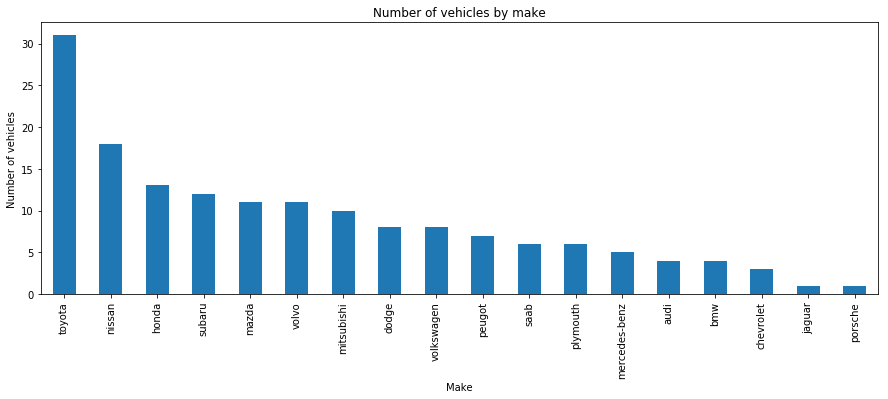

In [10]:
data.make.value_counts().plot(kind='bar', figsize=(15,5))

plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

In [0]:
data["safe"] = data["symboling"].isin(["-2", "-1", "0"])

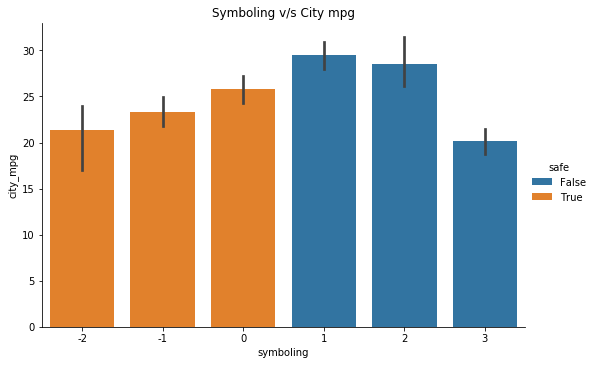

In [12]:
sns.catplot(x = "symboling", y = "city_mpg",
            hue = "safe", data = data,
            dodge = False, kind = "bar", aspect = 1.5)

plt.title("Symboling v/s City mpg")
plt.show()

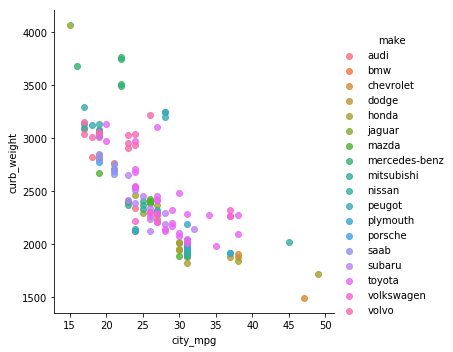

In [13]:
sns.lmplot('city_mpg', 'curb_weight',
            data, hue = 'make',
            fit_reg = False)

In [0]:
import altair as alt

In [0]:
plot = alt.Chart(data).mark_point().encode(
         x = 'horsepower',
         y = 'city_mpg',
         color = 'body_style').interactive()

In [16]:
plot

alt.Chart(...)

In [17]:
interval = alt.selection_interval()

base = alt.Chart(data).mark_point().encode(
         y = 'price',
         color = alt.condition(interval, 'fuel_system',
                               alt.value('lightgray'))).properties(selection=interval)

base.encode(x = 'city_mpg') | base.encode(x = 'horsepower')

alt.HConcatChart(...)

#### dropping variables

In [18]:
data = data.drop(['height', 'stroke', 'compression_ratio',
                  'num_of_doors', 'normalized_losses', 'safe',
                  'engine_location','city_mpg'], axis=1)
data.head()



,symboling,make,fuel_type,aspiration,body_style,drive_wheels,wheel_base,length,width,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,horsepower,peak_rpm,highway_mpg,price
0,2,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,5500,30,13950
1,2,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,5500,22,17450
2,1,audi,gas,std,sedan,fwd,105.8,192.7,71.4,2844,ohc,five,136,mpfi,3.19,110,5500,25,17710
3,1,audi,gas,turbo,sedan,fwd,105.8,192.7,71.4,3086,ohc,five,131,mpfi,3.13,140,5500,20,23875
4,2,bmw,gas,std,sedan,rwd,101.2,176.8,64.8,2395,ohc,four,108,mpfi,3.50,101,5800,29,16430


#### one-hot encoding

In [19]:
data = pd.get_dummies(data, drop_first=True)

data.head()

,symboling,wheel_base,length,width,curb_weight,engine_size,bore,horsepower,peak_rpm,highway_mpg,price,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel_type_gas,aspiration_turbo,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
0,2,99.8,176.6,66.2,2337,109,3.19,102,5500,30,13950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,2,99.4,176.6,66.4,2824,136,3.19,115,5500,22,17450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,1,105.8,192.7,71.4,2844,136,3.19,110,5500,25,17710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,1,105.8,192.7,71.4,3086,131,3.13,140,5500,20,23875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,2,101.2,176.8,64.8,2395,108,3.50,101,5800,29,16430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop('price', axis = 1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))
print(r2_score(y_test, pred))

1330.6219075897088
3390806.951448631
0.874657542988818


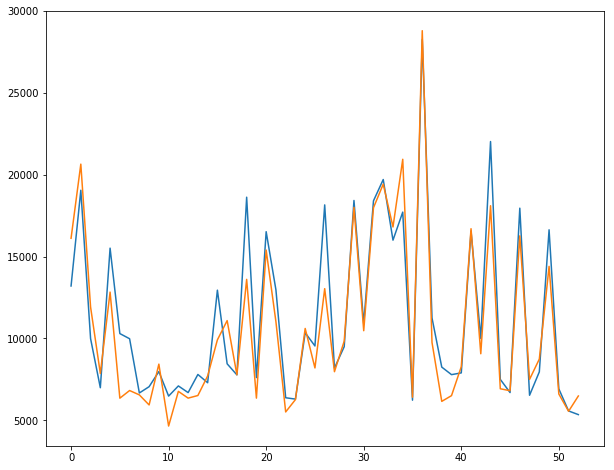

In [24]:
plt.figure(figsize=(10, 8))

plt.plot(y_test.values)
plt.plot(pred)